# Exploratry Data Analysis (EDA)

## Import Necessary Packages

In [1]:
# Pandas and numpy for data manipulation
import pandas as pd
import numpy as np
import os
 
# Matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
%matplotlib inline

import matplotlib
matplotlib.rcParams['font.size'] = 16
matplotlib.rcParams['figure.figsize'] = (12, 8)
import seaborn as sns

from pandas.plotting import register_matplotlib_converters
from sklearn.model_selection import train_test_split
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

import seaborn as sns

from IPython.core.pylabtools import figsize

# Scipy helper functions
from scipy.stats import percentileofscore
from scipy import stats

In [2]:
def groupcount(df,p):
    c1 = []
    c2 = []
    c3 = []
    c4 = []
    
    for j in p:
        perval = df[(df["Period"] == j) & (df["CrsEn"] == "DifCal")]
        #print(len(perval))
        lp = perval.groupby(by="Group").count()
        c1.append(len(lp))
        
    for j in p:
        perval = df[(df["Period"] == j) & (df["CrsEn"] == "IntCal")]
        #print(len(perval))
        lp = perval.groupby(by="Group").count()
        c2.append(len(lp))    
        
    for j in p:
        perval = df[(df["Period"] == j) & (df["CrsEn"] == "VecCal")]
        #print(len(perval))
        lp = perval.groupby(by="Group").count()
        c3.append(len(lp))  
        
    for j in p:
        perval = df[(df["Period"] == j) & (df["CrsEn"] == "DifEqs")]
        #print(len(perval))
        lp = perval.groupby(by="Group").count()
        c4.append(len(lp))   
            
    results = pd.DataFrame(index=p)
    results["DifCal"] = c1
    results["IntCal"] = c2
    results["VecCal"] = c3
    results["DifEqs"] = c4
        
    return results

In [3]:
def corrmat(df):
    corr_matrix = df.corr()
    corr_matrix.style.background_gradient().set_precision(2)
    mask = np.array(corr_matrix)
    mask[np.tril_indices_from(mask)] = False
    sns.heatmap(corr_matrix, mask=mask,vmax=1, square=True,annot=True,cmap="Blues")
    b, t = plt.ylim() # discover the values for bottom and top
    b += 0.5 # Add 0.5 to the bottom
    t -= 0.5 # Subtract 0.5 from the top
    plt.ylim(b, t) # update the ylim(bottom, top) values
    plt.title("Correlation Matrix")
    plt.show()

In [4]:
df = pd.read_csv("ITCH_IntroMathAcademicData.csv")

In [5]:
df.head()

,studentID,Major,MajorT,Year,Semester,CrsEn,Order,Grade,SGrade,Pass,Fail,Count,Instructor,RepEn,MethEn,Group,Period
0,12060799,19,CHM,2012,3,DifCal,1,0,69,0,1,1,LIMAS FRESCAS BLANCA ROSA,0,Complementary,A,20123
1,12060799,19,CHM,2013,1,DifCal,1,71,71,1,0,1,CERECERES ARVIZO CESAR AUGUSTO,1,Ordinary,H,20131
2,12060799,19,CHM,2013,3,IntCal,2,0,69,0,1,1,AGUIRRE PARRES AMALIA CONCEPCION,0,Complementary,B,20133
3,12060799,19,CHM,2014,3,IntCal,2,78,78,1,0,1,DIAZ PEÑA MIREYA ARMIDA,1,Ordinary,F,20143
4,12060799,19,CHM,2015,1,VecCal,3,0,69,0,1,1,LIMAS FRESCAS BLANCA ROSA,0,Complementary,C,20151


In [6]:
# Show basic descriptive statistics
df.describe()

,Major,Year,Semester,Order,Grade,SGrade,Pass,Fail,Count,RepEn,Period
count,14949.000000,14949.000000,14949.000000,14949.000000,14949.000000,14949.000000,14949.000000,14949.000000,14949.0,14949.000000,14949.000000
mean,25.532009,2017.222557,2.080072,2.052846,54.719446,77.377885,0.671617,0.328383,1.0,0.310121,20174.305639
std,4.829706,1.566784,0.967327,1.034081,38.863151,8.975625,0.469641,0.469641,0.0,0.554392,15.606923
min,19.000000,2010.000000,1.000000,1.000000,0.000000,69.000000,0.000000,0.000000,1.0,0.000000,20103.000000
25%,22.000000,2016.000000,1.000000,1.000000,0.000000,69.000000,0.000000,0.000000,1.0,0.000000,20163.000000
50%,25.000000,2017.000000,3.000000,2.000000,75.000000,75.000000,1.000000,0.000000,1.0,0.000000,20173.000000
75%,26.000000,2019.000000,3.000000,3.000000,84.000000,84.000000,1.000000,1.000000,1.0,1.000000,20191.000000
max,37.000000,2019.000000,3.000000,4.000000,100.000000,100.000000,1.000000,1.000000,1.0,2.000000,20193.000000


Since most data is categorical or just counts of each row there is not alot of information here.
<br>
Though the table does show the mean of the grades, this is not accurate since any grade lower than 70 is classifed as "0"
<br>
However the Pass/Fail columns do give the overall pass (68.50%) and fail(31.50%) rates for all the intro math courses as a whole.
<br>
A more thorough analysis needs to be done in order to extract useful inofrmation

## Look at the value counts for each numeric variable
Using this method can give us a better idea of the distribution for each variable
<br>
Using histograms can give us a better visualization of the basic statistics

In [7]:
# Print the value counts for categorical columns
for col in df.columns:
    if df[col].dtype == 'int64':
        print('\nColumn Name:', col,)
        print(df[col].value_counts())


Column Name: Major
25    4231
33    3131
23    2350
22    1727
19    1674
26     790
21     657
37     389
Name: Major, dtype: int64

Column Name: Year
2019    4043
2018    3414
2017    2838
2016    2218
2015    1561
2014     690
2013     166
2012      16
2011       2
2010       1
Name: Year, dtype: int64

Column Name: Semester
3    7640
1    6443
2     866
Name: Semester, dtype: int64

Column Name: Order
1    5875
2    4152
3    3179
4    1743
Name: Order, dtype: int64

Column Name: Grade
0      4909
70     1511
80      661
85      522
75      460
82      422
78      409
90      401
83      378
81      360
84      355
86      354
77      346
88      339
79      327
100     315
76      311
74      281
87      280
73      246
72      219
91      215
89      213
92      209
95      169
93      162
71      135
94      134
96      115
97       82
98       73
99       36
Name: Grade, dtype: int64

Column Name: SGrade
69     4909
70     1511
80      661
85      522
75      460
82      422
7

## Look at the value counts for each categorical variable

In [8]:
# Print the value counts for categorical columns
for col in df.columns:
    if df[col].dtype == 'object':
        print('\nColumn Name:', col,)
        print(df[col].value_counts())


Column Name: studentID
15060976    10
15061507    10
14060129    10
13060033    10
13060052    10
            ..
19061153     1
19061016     1
19061405     1
19060505     1
19061220     1
Name: studentID, Length: 4245, dtype: int64

Column Name: MajorT
IND    4231
EME    3131
MEC    2350
ELT    1727
CHM    1674
MAT     790
ELC     657
EAD     389
Name: MajorT, dtype: int64

Column Name: CrsEn
DifCal    5875
IntCal    4152
VecCal    3179
DifEqs    1743
Name: CrsEn, dtype: int64

Column Name: Instructor
JUAREZ MARTINEZ JESUS                 1178
LIMAS FRESCAS BLANCA ROSA             1130
MANZANERA QUINTANA MARIA ISABEL       1054
AGUIRRE PARRES AMALIA CONCEPCION       931
ALEJOS VIZCARRA ARTURO                 900
CABRALES ROSALES YOLANDA               881
DIAZ PEÑA MIREYA ARMIDA                839
LEON RUBIO ANGEL GABRIEL               823
SEPULVEDA CONTRERAS JUAN ENRIQUE       775
CLEMENTE SALAZAR MARCO ANTONIO         575
AGUILAR MIRANDA GILBERTO               553
GALLEGOS OROZCO VER

## Histograms of Numeric Variables

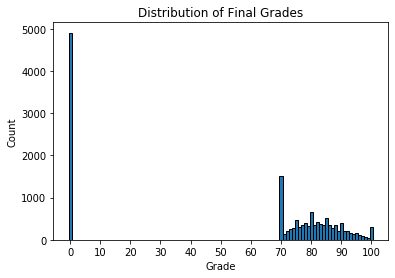

In [9]:
# Bar plot of grades
plt.bar(df['Grade'].value_counts().index, 
        df['Grade'].value_counts().values,
         fill = 'navy', edgecolor = 'k', width = 1)
plt.xlabel('Grade'); plt.ylabel('Count'); plt.title('Distribution of Final Grades');
plt.xticks(list(range(0, 105,10)));

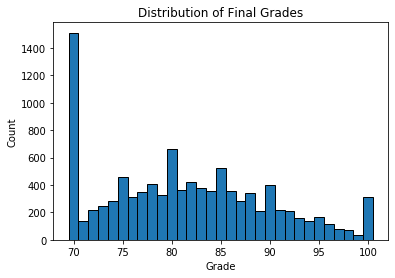

In [10]:
# Bar plot of grades ignoring 0
grades0 = df[df["Grade"] > 0].copy()
plt.bar(grades0['Grade'].value_counts().index, 
        grades0['Grade'].value_counts().values,
         fill = 'navy', edgecolor = 'k', width = 1)
plt.xlabel('Grade'); plt.ylabel('Count'); plt.title('Distribution of Final Grades');
plt.xticks(list(range(70, 101,5)));

The grade distribution is not ideal because of the large gap between 0 and passing grades.
<br>
Overall the passing grades look somewhat noramalized, but not ideal due to spikes at 70,75,80,85,90, and 100.
<br>
Grades will have to be standarized or reclass 0 to 69 to maintain a better contineous variable.

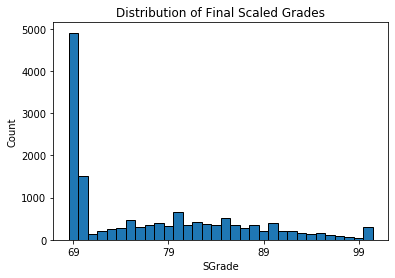

In [11]:
# Bar plot of grades, making 0 69
plt.bar(df['SGrade'].value_counts().index, 
        df['SGrade'].value_counts().values,
         fill = 'navy', edgecolor = 'k', width = 1)
plt.xlabel('SGrade'); plt.ylabel('Count'); plt.title('Distribution of Final Scaled Grades');
plt.xticks(list(range(69, 105,10)));

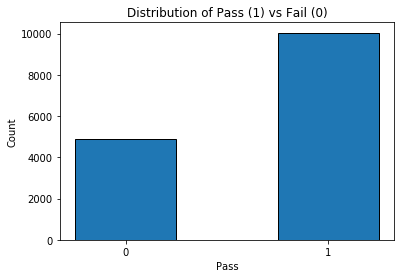

In [12]:
# Look at only Pass vs Fail
plt.bar(df['Pass'].value_counts().index, 
        df['Pass'].value_counts().values,
         fill = 'navy', edgecolor = 'k', width = 0.5)
plt.xlabel('Pass'); plt.ylabel('Count'); plt.title('Distribution of Pass (1) vs Fail (0)');
plt.xticks(list(range(0,2)));

In terms of just pass and fail we can see that more stuents pass and than fail by more than a 2:1 ratio.
<br> 
However this demonstrates that the target classes are imbalanced

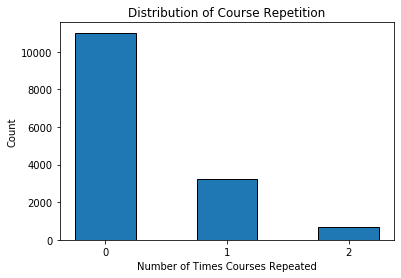

In [13]:
# Look at Repetition of course
plt.bar(df['RepEn'].value_counts().index, 
        df['RepEn'].value_counts().values,
         fill = 'navy', edgecolor = 'k', width = 0.5)
plt.xlabel('Number of Times Courses Repeated'); plt.ylabel('Count'); plt.title('Distribution of Course Repetition');
plt.xticks(list(range(0,3)));

Most students pass the course the first time they take it, about a third (< 4,000) othe students took courses the second time, and less than 1,000 students needed to take course for a third time.

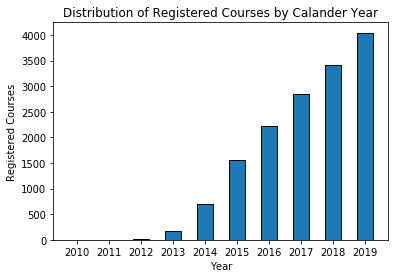

In [14]:
# Look at number of courses by year only
plt.bar(df['Year'].value_counts().index, 
        df['Year'].value_counts().values,
         fill = 'navy', edgecolor = 'k', width = 0.5)
plt.xlabel('Year'); plt.ylabel('Registered Courses'); plt.title('Distribution of Registered Courses by Calander Year');
plt.xticks(list(range(2010,2020,1)));

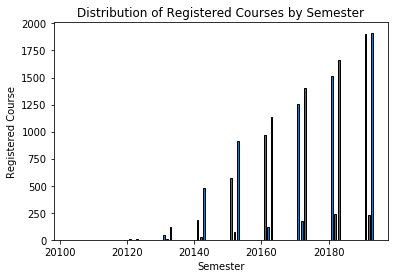

In [15]:
# Look at number of courses by Semester(perids)
plt.bar(df['Period'].value_counts().index, 
        df['Period'].value_counts().values,
         fill = 'navy', edgecolor = 'k', width = 0.5)
plt.xlabel('Semester'); plt.ylabel('Registered Course'); plt.title('Distribution of Registered Courses by Semester');

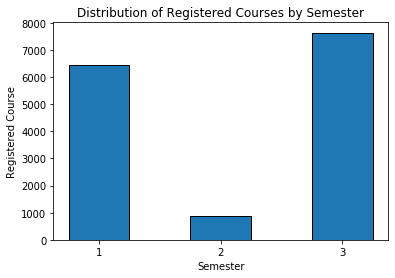

In [16]:
# Look at number of courses by Semester only
plt.bar(df['Semester'].value_counts().index, 
        df['Semester'].value_counts().values,
         fill = 'navy', edgecolor = 'k', width = 0.5)
plt.xlabel('Semester'); plt.ylabel('Registered Course'); plt.title('Distribution of Registered Courses by Semester');
plt.xticks(list(range(1,4,1)));

The first four digits are the year and the last digit is the semester in that year.
<br>
1 = Spring, 2 = Summer, 3 = Fall
<br>
The y-axis is registred number of courses NOT number of students since each record in the dataframe is a student taking a course.
<br>
The number of courses keeps increasing every year, this might be a sign that data tracking was not implemented in the earlier years as some years have less than 1,000 registered courses and others more than 5,000.
<br>
It is also clear that the summer semester has significantly less registred courses and thus students. The Fall tends to have the most number of regestred courses.

## Histograms of Categorical Variables

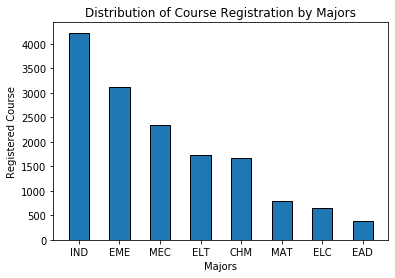

In [17]:
# Look at number of registerd courses by Major
plt.bar(df['MajorT'].value_counts().index, 
        df['MajorT'].value_counts().values,
         fill = 'navy', edgecolor = 'k', width = 0.5)
plt.xlabel('Majors'); plt.ylabel('Registered Course'); plt.title('Distribution of Course Registration by Majors');
plt.xticks(list(range(0,8,1)));

There is clear variation in the number of coursses taken by each major.
<br>
Still not clear if its soley due to more stuents in that major.
<br>
Possible some majors fail more than others. 

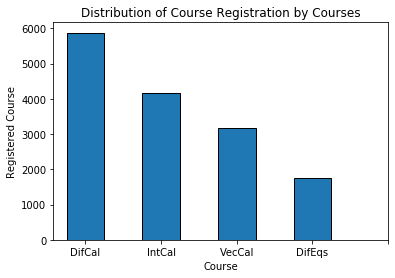

In [18]:
# Look at number of registerd courses by Major
plt.bar(df['CrsEn'].value_counts().index, 
        df['CrsEn'].value_counts().values,
         fill = 'navy', edgecolor = 'k', width = 0.5)
plt.xlabel('Course'); plt.ylabel('Registered Course'); plt.title('Distribution of Course Registration by Courses');
plt.xticks(list(range(0,5,1)));

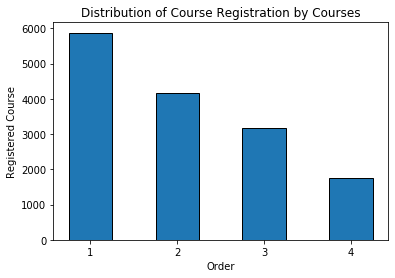

In [19]:
# Look at number of registerd courses by course order
plt.bar(df['Order'].value_counts().index, 
        df['Order'].value_counts().values,
         fill = 'navy', edgecolor = 'k', width = 0.5)
plt.xlabel('Order'); plt.ylabel('Registered Course'); plt.title('Distribution of Course Registration by Courses');
plt.xticks(list(range(1,5,1)));

Comparing the distribution between course order and type, some courses fall into different/multiple orders.

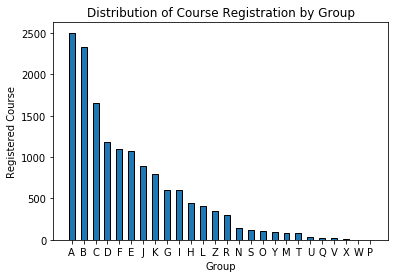

In [20]:
# Look at number of registerd courses by Groups
plt.bar(df['Group'].value_counts().index, 
        df['Group'].value_counts().values,
         fill = 'navy', edgecolor = 'k', width = 0.5)
plt.xlabel('Group'); plt.ylabel('Registered Course'); plt.title('Distribution of Course Registration by Group');
plt.xticks(list(range(0,26,1)));

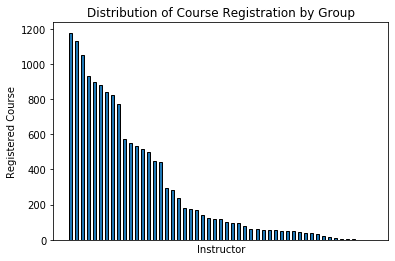

In [21]:
# Look at number of registerd courses by Groups
# Names are too long to plot, but still show visual distribution
plt.bar(df['Instructor'].value_counts().index, 
        df['Instructor'].value_counts().values,
         fill = 'navy', edgecolor = 'k', width = 0.5)
plt.xlabel('Instructor'); plt.ylabel('Registered Course'); plt.title('Distribution of Course Registration by Group');
plt.xticks(ticks=[],labels=None);

There is clear wide varation in the frequency distribution of the number of registerd courses assgined to each group and instructior.

## Cross-Variable EDA 
### Visualize how variables interact/compare with others
Function quickly calcuates totals for each feature in relation to another feature

In [22]:
# Create fails dataset and pass dataset
fails = df[df["Pass"] == 0]
passes = df[df["Pass"] == 1]

In [23]:
# Function that aggreates values
def vsum(df,var):
    df1 = df.groupby(by=[str(var)]).sum()
    df1["PassRT"] = ((df1.Pass/df1.Count) * 100).astype(float)
    df1["FailRT"] = 100 - df1.PassRT
    return df1
    
    

Comparing the Passing rates across each major its clear to see that there is not alot of variation between them.
<br>
Overall there would only be a large difference between EAD and ELC majors with the rest being similar.

In [24]:
semester = vsum(df,"Semester")
semester

,Major,Year,Order,Grade,SGrade,Pass,Fail,Count,RepEn,Period,PassRT,FailRT
Semester,,,,,,,,,,,,
1,165218,12997951,13476,342402,497031,4202,2241,6443,2108,129985953,65.218066,34.781934
2,21434,1747066,2318,65818,70717,795,71,866,582,17472392,91.801386,8.198614
3,195026,15410443,14894,409781,588974,5043,2597,7640,1946,154127350,66.007853,33.992147


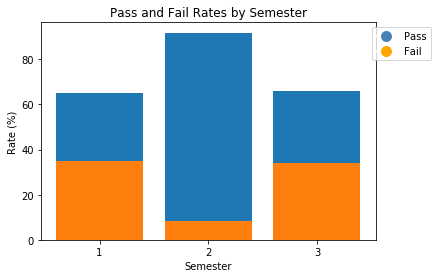

In [25]:
plt.bar(semester.index,semester.PassRT)
plt.bar(semester.index,semester.FailRT)
plt.title("Pass and Fail Rates by Semester")
plt.ylabel("Rate (%)")
plt.xlabel("Semester")
plt.xticks(list(range(1,4,1)))
legend_elements = [Line2D([0], [0], marker = 'o',color='w',markerfacecolor = 'steelblue',
                              label='Pass',markersize=12),
                       Line2D([0], [0], marker='o', color='w', label='Fail',
                          markerfacecolor='orange', markersize=12)]

plt.legend(handles=legend_elements,bbox_to_anchor=(1.18, 1), loc='best');

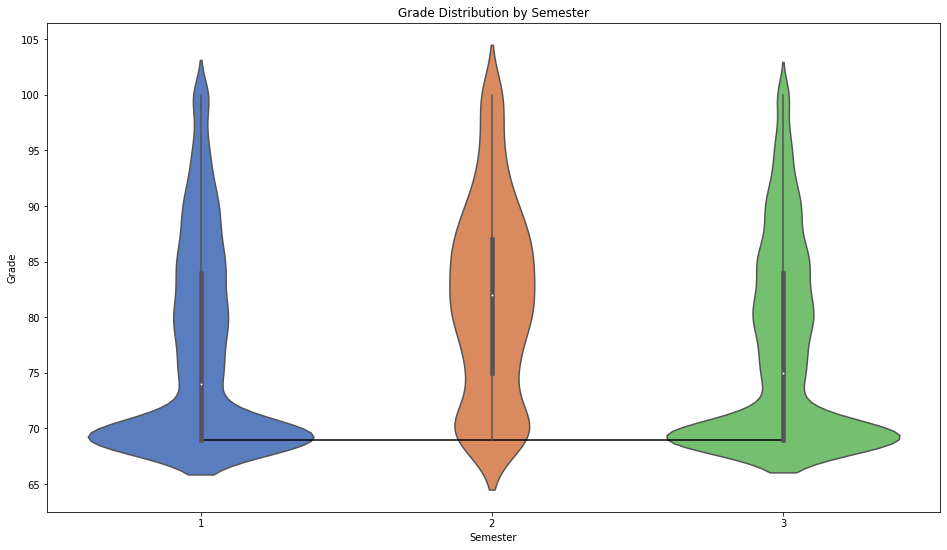

In [26]:
plt.figure(figsize=(16,9))
ax = sns.violinplot(x = "Semester", y = "SGrade", data = df,palette = sns.color_palette("muted"))
plt.hlines(69,0,2)
plt.xlabel("Semester")
plt.ylabel("Grade")
plt.title("Grade Distribution by Semester");

Eventhough Semester 2 has a high passing rate, we know that it also has the lowest number of registerd courses
<br>
There is marginal to no differecne between passing rates between first (spring) and third (fall) semesters.

In [27]:
course = vsum(df,"CrsEn")
course

,Major,Year,Semester,Order,Grade,SGrade,Pass,Fail,Count,RepEn,Period,PassRT,FailRT
CrsEn,,,,,,,,,,,,,
DifCal,149280,11850506,12955,5875,284902,446707,3530,2345,5875,2161,118518015,60.085106,39.914894
DifEqs,44424,3516751,3312,6972,105172,137257,1278,465,1743,442,35170822,73.321859,26.678141
IntCal,106725,8375074,7893,8304,230366,323378,2804,1348,4152,1283,83758633,67.533719,32.466281
VecCal,81249,6413129,6935,9537,197561,249380,2428,751,3179,750,64138225,76.376219,23.623781


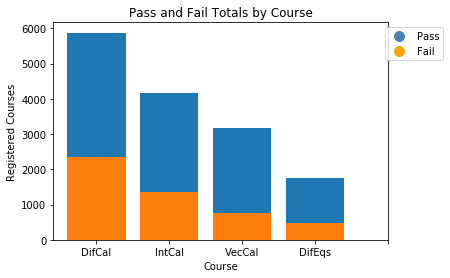

In [28]:
course = course.sort_values(by="Count",ascending = False)
plt.bar(course.index,course.Count)
plt.bar(course.index,course.Fail)
plt.title("Pass and Fail Totals by Course")
plt.ylabel("Registered Courses")
plt.xlabel("Course")
plt.xticks(list(range(0,5,1)))
legend_elements = [Line2D([0], [0], marker = 'o',color='w',markerfacecolor = 'steelblue',
                              label='Pass',markersize=12),
                       Line2D([0], [0], marker='o', color='w', label='Fail',
                          markerfacecolor='orange', markersize=12)]

plt.legend(handles=legend_elements,bbox_to_anchor=(1.18, 1), loc='best');

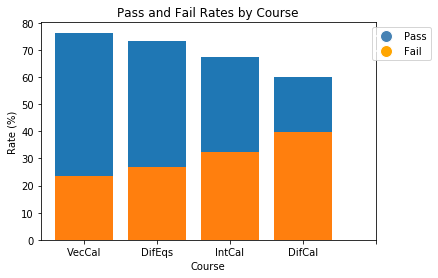

In [29]:
course = course.sort_values(by="PassRT",ascending = False)
plt.bar(course.index,course.PassRT)
plt.bar(course.index,course.FailRT)
plt.title("Pass and Fail Rates by Course")
plt.ylabel("Rate (%)")
plt.xlabel("Course")
plt.xticks(list(range(0,5,1)))
legend_elements = [Line2D([0], [0], marker = 'o',color='w',markerfacecolor = 'steelblue',
                              label='Pass',markersize=12),
                       Line2D([0], [0], marker='o', color='w', label='Fail',
                          markerfacecolor='orange', markersize=12)]

plt.legend(handles=legend_elements,bbox_to_anchor=(1.18, 1), loc='best');

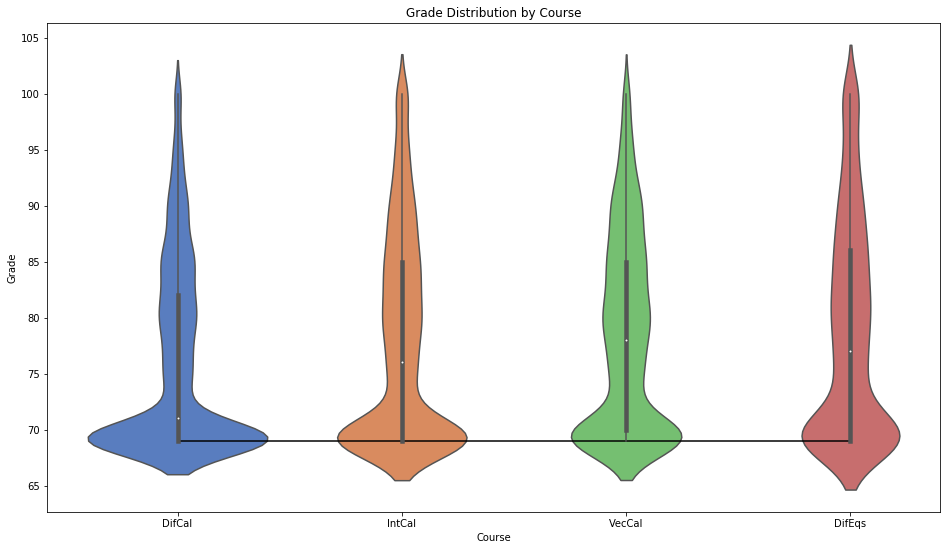

In [30]:
plt.figure(figsize=(16,9))
ax = sns.violinplot(x = "CrsEn", y = "SGrade", data = df,palette = sns.color_palette("muted"))
plt.hlines(69,0,3)
plt.xlabel("Course")
plt.ylabel("Grade")
plt.title("Grade Distribution by Course");

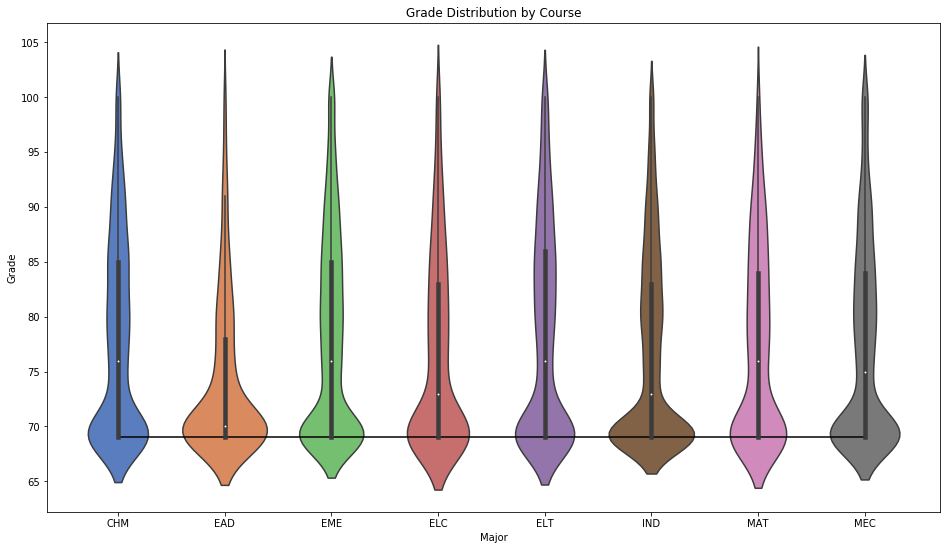

In [31]:
plt.figure(figsize=(16,9))
ax = sns.violinplot(x = "MajorT", y = "SGrade", data = df,palette = sns.color_palette("muted"))
plt.xlabel("Major")
plt.ylabel("Grade")
plt.hlines(69,0,7)
plt.title("Grade Distribution by Course");

Here the relationship between passing and courses becomes a bit more clear.
<br>
DifCal has the most registered course and has the highest failure rate when normalized.
<br>
The other courses maintain a similar pass to fail ratio.

In [32]:
# Show what the mean grade and passing rates
print(df.SGrade.mean())
print(df.Pass.mean())

77.37788480834838
0.6716168305572279


In [33]:
df.groupby(by="CrsEn").mean()

,Major,Year,Semester,Order,Grade,SGrade,Pass,Fail,Count,RepEn,Period
CrsEn,,,,,,,,,,,
DifCal,25.409362,2017.107404,2.205106,1.0,48.493957,76.035234,0.600851,0.399149,1.0,0.367830,20173.279149
DifEqs,25.487091,2017.642570,1.900172,4.0,60.339644,78.747562,0.733219,0.266781,1.0,0.253586,20178.325875
IntCal,25.704480,2017.118015,1.901012,2.0,55.483141,77.884875,0.675337,0.324663,1.0,0.309008,20173.081166
VecCal,25.558037,2017.341617,2.181504,3.0,62.145643,78.446052,0.763762,0.236238,1.0,0.235923,20175.597672


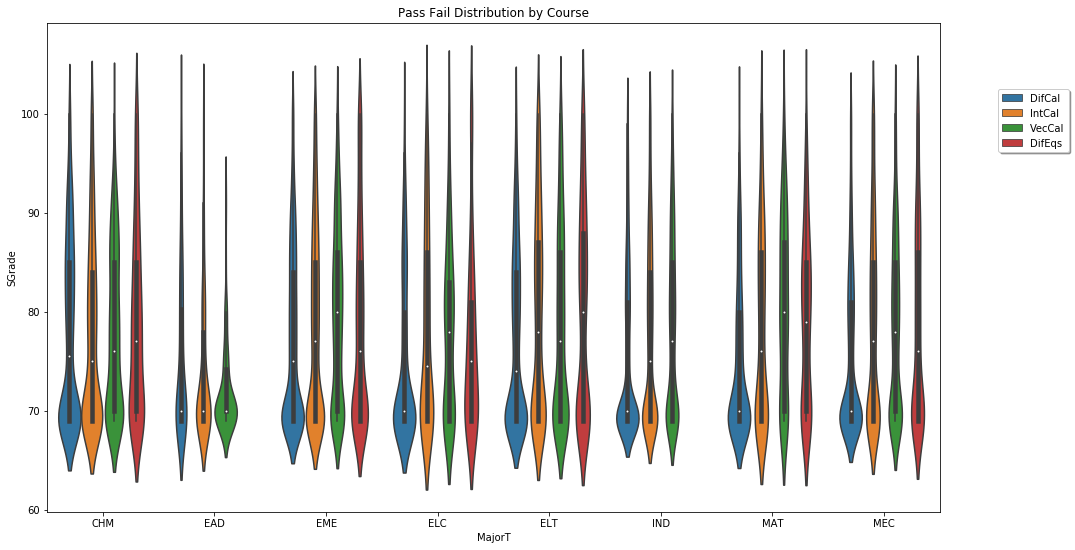

In [34]:
plt.figure(figsize=(16,9))
ax = sns.violinplot(x = "MajorT", y = "SGrade", data = df, hue = "CrsEn")
ax.legend(loc='right', bbox_to_anchor=(1.15, 0.8), shadow=True, ncol=1)
plt.title("Pass Fail Distribution by Course");

In [35]:
rep = vsum(df,"RepEn")
rep

,Major,Year,Semester,Order,Grade,SGrade,Pass,Fail,Count,Period,PassRT,FailRT
RepEn,,,,,,,,,,,,
0,281802,22210943,23384,23217,583791,853305,7105,3906,11011,222132814,64.526383,35.473617
1,82255,6536211,6312,6197,186634,249355,2331,909,3240,65368422,71.944444,28.055556
2,17621,1408306,1399,1274,47576,54062,604,94,698,14084459,86.532951,13.467049


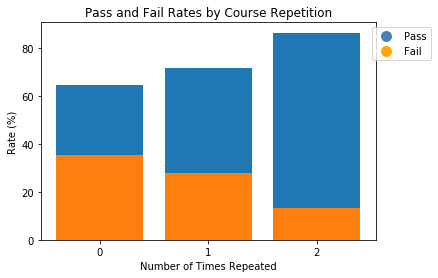

In [36]:
rep = rep.sort_values(by="PassRT",ascending = False)
plt.bar(rep.index,rep.PassRT)
plt.bar(rep.index,rep.FailRT)
plt.title("Pass and Fail Rates by Course Repetition")
plt.ylabel("Rate (%)")
plt.xlabel("Number of Times Repeated")
plt.xticks(list(range(0,3,1)))
legend_elements = [Line2D([0], [0], marker = 'o',color='w',markerfacecolor = 'steelblue',
                              label='Pass',markersize=12),
                       Line2D([0], [0], marker='o', color='w', label='Fail',
                          markerfacecolor='orange', markersize=12)]

plt.legend(handles=legend_elements,bbox_to_anchor=(1.18, 1), loc='best');

<Figure size 1152x648 with 0 Axes>

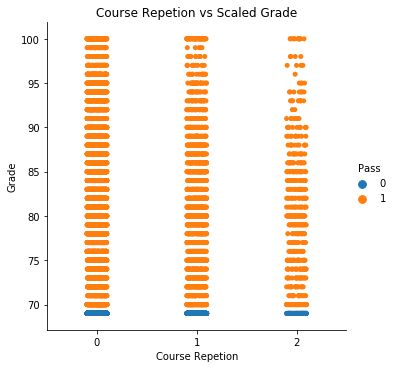

In [37]:
plt.figure(figsize=(16,9))
ax = sns.catplot(x="RepEn", y="SGrade", data=df, hue= 'Pass');
plt.title("Course Repetion vs Scaled Grade")
plt.xlabel("Course Repetion")
plt.ylabel("Grade");

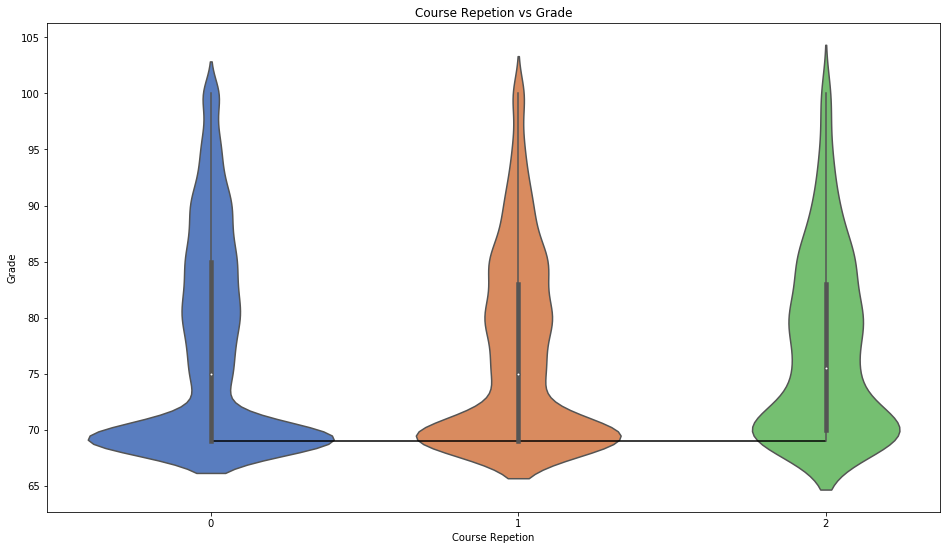

In [38]:
plt.figure(figsize=(16,9))
ax = sns.violinplot(x="RepEn", y="SGrade", data=df, palette = sns.color_palette("muted"));
plt.hlines(69,0,2)
plt.title("Course Repetion vs Grade")
plt.xlabel("Course Repetion")
plt.ylabel("Grade");

There is a clear trend that the more times a course is taken the more likely the it is to be passed.

In [39]:
ins = vsum(df,"Instructor")
print("Number of unique instructor",len(ins))
print("Average number of registered course/students instructed",ins.Count.mean())
ins1 = ins[ins["Count"] > 800]

Number of unique instructor 51
Average number of registered course/students instructed 293.11764705882354


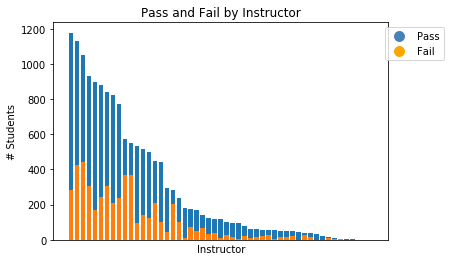

In [40]:
ins = ins.sort_values(by="Count",ascending = False)
plt.bar(ins.index,ins.Count)
plt.bar(ins.index,ins.Fail)
plt.title("Pass and Fail by Instructor")
plt.ylabel("# Students")
plt.xlabel("Instructor")
plt.xticks(ticks=[],labels=None)
legend_elements = [Line2D([0], [0], marker = 'o',color='w',markerfacecolor = 'steelblue',
                              label='Pass',markersize=12),
                       Line2D([0], [0], marker='o', color='w', label='Fail',
                          markerfacecolor='orange', markersize=12)]

plt.legend(handles=legend_elements,bbox_to_anchor=(1.18, 1), loc='best');

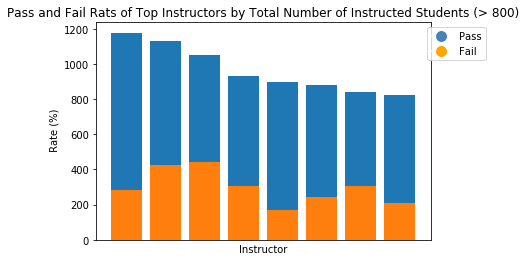

In [41]:
ins1 = ins1.sort_values(by="Count",ascending = False)
plt.bar(ins1.index,ins1.Count)
plt.bar(ins1.index,ins1.Fail)
plt.title("Pass and Fail Rats of Top Instructors by Total Number of Instructed Students (> 800)")
plt.ylabel(" Rate (%)")
plt.xlabel("Instructor")
plt.xticks(ticks=[],labels=None)
legend_elements = [Line2D([0], [0], marker = 'o',color='w',markerfacecolor = 'steelblue',
                              label='Pass',markersize=12),
                       Line2D([0], [0], marker='o', color='w', label='Fail',
                          markerfacecolor='orange', markersize=12)]

plt.legend(handles=legend_elements,bbox_to_anchor=(1.18, 1), loc='best');

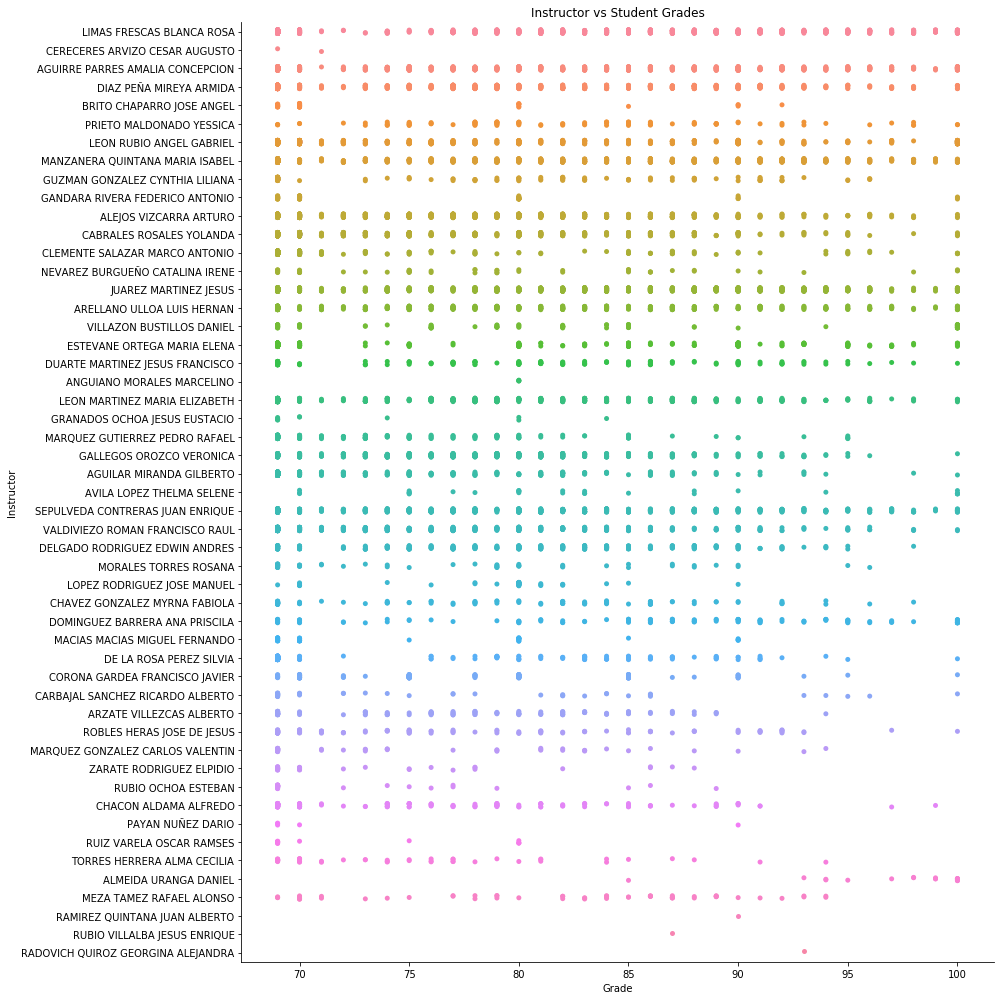

In [42]:
ax = sns.catplot(x="SGrade", y="Instructor", data=df,height=14, aspect=1)
plt.title("Instructor vs Student Grades")
plt.xlabel("Grade")
ax.fig.tight_layout();

Comparing all instructors even when normlaiszed by number of students instructed is unfair because some have taught hundreds of students whil others have only taught few. This skews their metrics by either having all passig or failing students.
<br>
Show the passing rates of the most seasoned instructors shows a better representation of an instructors passing rate.

In [43]:
 # Look how the nubmers of groups change over time
p = np.array([20123, 20131, 20133, 20141, 20143, 20151, 20153, 20161, 20163,
       20132, 20142, 20162, 20172, 20152, 20171, 20173, 20183, 20191,
       20182, 20181, 20193, 20192, 20121, 20122, 20103, 20111, 20113])
p = np.sort(p)
p

array([20103, 20111, 20113, 20121, 20122, 20123, 20131, 20132, 20133,
       20141, 20142, 20143, 20151, 20152, 20153, 20161, 20162, 20163,
       20171, 20172, 20173, 20181, 20182, 20183, 20191, 20192, 20193])

In [44]:
# Aggretgate group count resutls by period and course
gcount = groupcount(df,p)
sem1 = gcount[3::3]

In [45]:
# only show the first semster data
sem1

,DifCal,IntCal,VecCal,DifEqs
20121,3,0,1,0
20131,6,3,0,0
20141,8,13,6,1
20151,13,13,10,6
20161,16,16,11,9
20171,13,14,12,7
20181,15,16,12,8
20191,15,15,10,7


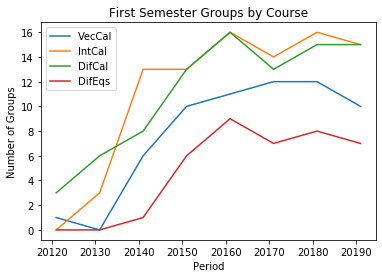

In [46]:
plt.title("First Semester Groups by Course")
plt.plot(sem1.index,sem1.VecCal, label = "VecCal")
plt.plot(sem1.index,sem1.IntCal, label = "IntCal")
plt.plot(sem1.index,sem1.DifCal, label = "DifCal")
plt.plot(sem1.index,sem1.DifEqs, label = "DifEqs")
plt.xlabel("Period")
plt.ylabel("Number of Groups")
plt.legend(loc="best");

<Figure size 432x288 with 0 Axes>

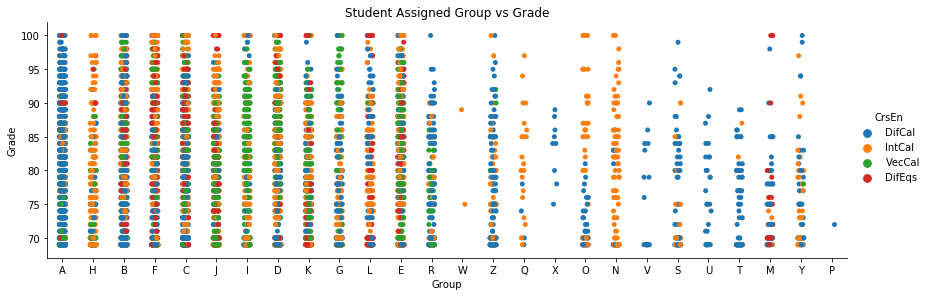

In [47]:
plt.figure(figsize=(6,4))
sns.catplot(x="Group", y="SGrade", hue = "CrsEn", data=df,height=4, aspect=3);
plt.ylabel("Grade")
plt.title("Student Assigned Group vs Grade");

## Correlation Analysis
Method to see how well correlated features are with the target variable of passing/failing a course.
<br>
Since correlations are a numerical calcualation, categorical variables need to be reclasses as one-hot encoding.

In [48]:
df.keys()

Index(['studentID', 'Major', 'MajorT', 'Year', 'Semester', 'CrsEn', 'Order',
       'Grade', 'SGrade', 'Pass', 'Fail', 'Count', 'Instructor', 'RepEn',
       'MethEn', 'Group', 'Period'],
      dtype='object')

In [49]:
df1 = df.copy()

In [50]:
# Select only categorical variables
# Remove studentID and othere variables that are not representative of the data or are encoded in other varibles
# Will hep with reducing the number of columns/features and avoid a sparse matrix
df1 = df.copy()
df1 = df.drop(columns=["studentID","Period","Year","Major","Grade","SGrade","Count","MethEn"]).copy()
category_df = df1.select_dtypes('object')
# One hot encode the variables
dummy_df = pd.get_dummies(category_df)
# Put some of the numeric featues in the dataframe
dummy_df["Pass"] = df["Pass"]
dummy_df["RepEn"] = df["RepEn"]
dummy_df["Semester"]= df["Semester"]
dummy_df.head()

,MajorT_CHM,MajorT_EAD,MajorT_ELC,MajorT_ELT,MajorT_EME,MajorT_IND,MajorT_MAT,MajorT_MEC,CrsEn_DifCal,CrsEn_DifEqs,...,Group_T,Group_U,Group_V,Group_W,Group_X,Group_Y,Group_Z,Pass,RepEn,Semester
0,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,3
1,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,1,1
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,3
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [51]:
# Correlations in one-hot encoded dataframe
c1 = dummy_df.corr()['Pass'].sort_values(ascending=False)

In [52]:
c1.mean()

0.014553833880285636

In [53]:
# Top ten positive correlations
c1[:10]

Pass                                         1.000000
RepEn                                        0.109299
CrsEn_VecCal                                 0.101972
Instructor_ALEJOS VIZCARRA ARTURO            0.076977
Instructor_CORONA GARDEA FRANCISCO JAVIER    0.066747
Group_D                                      0.064478
Instructor_GALLEGOS OROZCO VERONICA          0.059172
Instructor_DELGADO RODRIGUEZ EDWIN ANDRES    0.056198
Instructor_JUAREZ MARTINEZ JESUS             0.055424
Instructor_PRIETO MALDONADO YESSICA          0.050866
Name: Pass, dtype: float64

In [54]:
cpos = dummy_df[c1[:10].keys()]

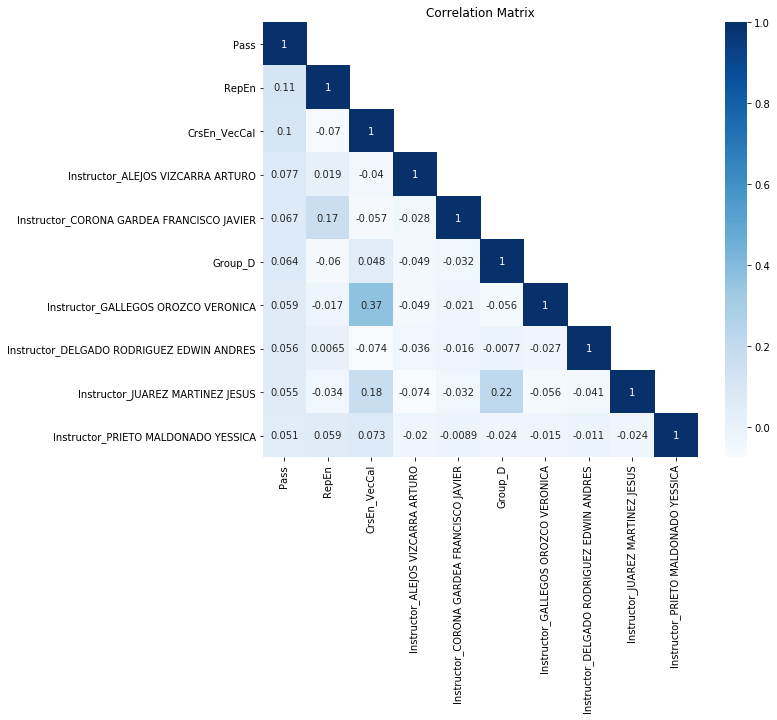

In [59]:
plt.figure(figsize=[10,8])
corrmat(cpos)

In [61]:
c2 = dummy_df.corr()['Pass'].sort_values(ascending=True)

In [62]:
# Top 10 negative correlations
c2[:10]

Instructor_AGUILAR MIRANDA GILBERTO          -0.141431
Instructor_CLEMENTE SALAZAR MARCO ANTONIO    -0.131232
CrsEn_DifCal                                 -0.121249
Instructor_DE LA ROSA PEREZ SILVIA           -0.114501
Group_A                                      -0.056732
Instructor_MANZANERA QUINTANA MARIA ISABEL   -0.053908
Instructor_ESTEVANE ORTEGA MARIA ELENA       -0.053542
Instructor_RUBIO OCHOA ESTEBAN               -0.043907
MajorT_IND                                   -0.041616
Group_C                                      -0.037146
Name: Pass, dtype: float64

In [63]:
cneg = dummy_df[c2[:10].keys()]
cneg["Pass"] = dummy_df["Pass"]

/Users/nando/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


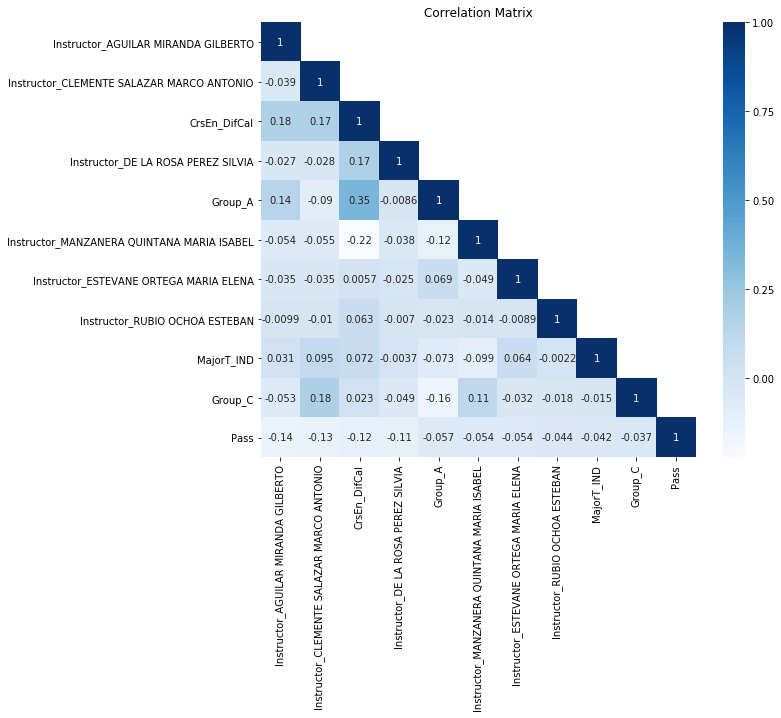

In [65]:
plt.figure(figsize=[10,8])
corrmat(cneg)

There are way too many features and most correlations are under + - 0.15 which is not very good